#### American Savings Bank
# 2021 PD UPDATE for HELOC
#### Retail Credit Policy

## Contents
1. [Summary](#1.-Summary)
2. [Data Overview](#2.-DATA-OVERVIEW)<br>
    2.1 [Data Requirements](#2.1-Data-Requirements)<br>
    2.2 [Data Generation Process](#2.2-Data-Generation-Process)<br>
    2.3 [Data Validation](#2.3-Data-Validation)<br>
3. [Model Overview](#3-Model-Overview)<br>
4. [Model Update](#4-Model-Update)

## 1. Summary

Retail Credit Policy (RCP) has been charged with the development and update of default probability models for the various consumer and Commercial and Industrial (C&I) portfolios.  These models are used for portfolio management and the calculation of loss expectancy within the Risk Adjusted Return on Capital (RAROC) framework.  This document describes the process utilized to update the HELOC portfolio model and describes the methods by which the updates are validated.

The HELOC portfolio is comprised of real-estate secured lines of credit and fixed-rate loan option (FRELO) instruments which are attached-to and utilize the commitment of the parent HELOC loan.  The HELOC lines have variable interest rates and preset draw and repayment periods while the FRELOs behave like term loans and have fixed interest rates and amortization schedules.  The products in the HELOC portfolio are shown in the table below.  FRELOs are not included in the modeling dataset as discrete loans, but they are assigned the risk parameters from the HELOC portfolio as a proxy for calculating Expected Loss.


| Product Code | Product Description |
| :-: | :-- |
| 540 | EQUITY MAXIMIZER LINE |
| 549 | EQUITY CREDIT LINE |
| 589 | EQUITY POWER LINE |
| 594 | LIBERTY HOME EQUITY LOC |
| 595 | EQUITY EXPRESS|
| 596 | EQUITY EXPRESS TOTAL LOC/ODP |
| 610 | (FRELO) CEL FRELO OPTION |
| 695 | (FRELO) EEX FIXED RATE LOAN OPTION |

## 2. DATA OVERVIEW

The data used for modeling is generated in a single file referred to as a historical banding file.  The historical banding file contains annual performance data for multiple years beginning in 2009.  As part of the data design, a portfolio snapshot is taken at the beginning of each performance period and tracked forward 12 months.  

If an account is originated after the beginning of the performance period it is not counted until the following performance period.  In an effort to preserve all defaults, an account originated after the beginning of the performance period that defaults within the performance period is included in the modeling data set and considered a non-baselined default.  During the data generation process, the current year’s performance data is appended to the prior year’s historical banding file which contains performance data for all prior years, to generate the current year’s historical banding file which is used in the modeling process.  

The file used for the model update is “HELOC_BANDING_FILE_2020 with Balance.csv” and can be found in the data repository for the 2021 model update. The model years and performance periods included in the banding file is shown in the table below.

##### Table 1. Overview of Performance Periods for 2021 Build

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

perf = pd.read_csv('/project_data/data_asset/table_Performance_Builds.csv')
perf.style


,Data Use,Balance Data as of Date,Build Year,Use Year,Performance Year,Performance Period,Performance Period.1,Survival Date
0,nan,nan,nan,nan,nan,Start Date,End Date,nan
1,Excluded,12/31/2008,2009.000000,2010,2009.000000,1/1/2009,12/31/2009,10/31/2009
2,nan,12/31/2009,2010.000000,2011,2010.000000,1/1/2010,12/31/2010,10/31/2010
3,Train,12/31/2010,2011.000000,2012,2011.000000,1/1/2011,12/31/2011,10/31/2011
4,nan,12/31/2011,2012.000000,2013,2012.000000,1/1/2012,12/31/2012,10/31/2012
5,nan,10/31/2012,2013.000000,2014,2013.000000,11/1/2012,10/31/2013,8/31/2013
6,nan,8/31/2013,2014.000000,2015,2014.000000,9/1/2013,8/31/2014,6/30/2014
7,nan,8/31/2014,2015.000000,2016,2015.000000,9/1/2014,8/31/2015,6/30/2015
8,nan,8/31/2015,2016.000000,2017,2016.000000,9/1/2015,8/31/2016,6/30/2016
9,nan,8/31/2016,2017.000000,2018-2021,2017.000000,9/1/2016,8/31/2017,6/30/2017


In [19]:
perf.columns

Index(['Data Use', 'Balance Data as of Date', 'Build Year', 'Use Year',
       'Performance Year', 'Performance Period', 'Performance Period.1',
       'Survival Date'],
      dtype='object')

In [20]:
perf

,Data Use,Balance Data as of Date,Build Year,Use Year,Performance Year,Performance Period,Performance Period.1,Survival Date
0,NaN,NaN,NaN,NaN,NaN,Start Date,End Date,NaN
1,Excluded,12/31/2008,2009.0,2010,2009.0,1/1/2009,12/31/2009,10/31/2009
2,NaN,12/31/2009,2010.0,2011,2010.0,1/1/2010,12/31/2010,10/31/2010
3,Train,12/31/2010,2011.0,2012,2011.0,1/1/2011,12/31/2011,10/31/2011
4,NaN,12/31/2011,2012.0,2013,2012.0,1/1/2012,12/31/2012,10/31/2012
5,NaN,10/31/2012,2013.0,2014,2013.0,11/1/2012,10/31/2013,8/31/2013
6,NaN,8/31/2013,2014.0,2015,2014.0,9/1/2013,8/31/2014,6/30/2014
7,NaN,8/31/2014,2015.0,2016,2015.0,9/1/2014,8/31/2015,6/30/2015
8,NaN,8/31/2015,2016.0,2017,2016.0,9/1/2015,8/31/2016,6/30/2016
9,NaN,8/31/2016,2017.0,2018-2021,2017.0,9/1/2016,8/31/2017,6/30/2017


In [ ]:
                  index=pd.Index(['Data Use', 'Balance Data as of Date']),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))


In [1]:
# s = perf.style.format('{:.0f}').hide_columns([('Index')])
# s

In [ ]:
df.style.applymap(color_negative_red, subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])


In [5]:
styles = [
    dict(selector='tr:nth-of-type(odd)', props=[('background', '#eee')]), 
    dict(selector='tr:nth-of-type(even)', props=[('background', 'green')]),
    dict(selector='th', props=[('background', '#33caff'), ('color', 'white'), ('font-family', 'verdana')]),
    dict(selector='td', props=[('font-family', 'verdana')]),
    dict(selector='tr:hover', props=[('background-color', 'pink')])
    ]

In [6]:
df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))
df.style.set_table_styles(styles)

In [7]:
cm = sns.light_palette("green", as_cmap=True)
(df.style
  .background_gradient(cmap=cm, subset=['Random','total_amt_usd_pct_diff'])
  .highlight_max(subset=['Random','total_amt_usd_pct_diff'])
  .set_caption('This is a custom caption.')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

In [27]:
styles = df.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)', 'props': [('background', '#eee')]}, 
{'selector': 'tr:nth-of-type(even)', 'props': [('background', 'white')]},
{'selector': 'th', 'props': [('background', '#33caff'), ('color', 'white'), ('font-family', 'verdana')]},
{'selector': 'td', 'props': [('font-family', 'verdana')]},
{'selector': 'tr:hover', 'props': [('background-color', 'pink')]}])


In [51]:
def color_red(val):
    if val < 20:
        color = 'red'
    elif val > 400:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

df.style.applymap(color_red)

In [12]:
s = df.style.format(formatter={('Decision Tree', 'Tumour'): "{:.2f}",('Decision Tree', 'Non-Tumour'): "{:.2f}",
                ('Regression', 'Non-Tumour'): lambda x: "{:,.0f}%".format(x*-1e6)
                })
#s = df.style.applymap(color_red)

In [13]:
s

In [2]:
# index_names = {'selector': '.index_name',
#     'props': 'font-style: italic; color: darkgrey; font-weight:normal;'}
# headers = {'selector': 'th:not(.index_name)',
#     'props': 'background-color: #000066; color: white;'}
# s.set_table_styles([index_names, headers])

In [3]:
# df.style.set_table_styles({

#     0: [{'selector': 'td:hover',

#          'props': [('font-size', '25px')]}]

# }, axis=1, overwrite=False)

### 2.1 Data Requirements

The current year’s banding file contains data reflective of the current 12 month performance period including customer’s credit scores, account-level data and flags indicating whether an account has gone into default during the performance period.  The data requirements for the current year’s banding file can be found in Appendix C.

### 2.2 Data Generation Process

The current year’s performance data was extracted from the Enterprise Data Warehouse (EDW) and combined with the customer’s credit scores obtained from Experian to generate the banding file for the current year.  The current year’s banding file data was appended to the prior year’s historical banding file to generate a cumulative historical banding file for use in the PD model update.

The banding file was generated in a controlled production environment by the Technology Data Management Team based on data requirements provided by the Credit Team.

Note:  The performance period start and end dates were rolled back by two months in both the 2014 and 2015 Model Years in order to align the performance periods with the bank’s operational and budget periods (see Period Table above).  Rolling back the performance period by two months resulted in the performance from the last two months of the prior Model Year being duplicated in the current Model Year.  E.g. Defaults that occurred in the last two months (Sept and Oct 2013) in the 2014 Model Year also appeared in the 2015 Model Year.    


###   2.3 Data Validation

The banding file generated by the Technology Data Management Team was validated by a member of the Retail Credit Policy and Analytics team.  A link to the data validation results can be found in Appendix D.

## 3 Model Overview

__Conceptual Soundness__

As part of the annual model update, the bank evaluates current and new variables to see if the performance of the model can be improved.  For each year’s update, the variables considered include credit scores and other reasonable loan attributes available on the file.

The poHELOCation was split into a training and validation dataset.  The training dataset was used to generate the model, and the validation dataset was used to evaluate the model. 

The bank has standardized on the use of logistic regression for default modeling.  Using the Logit is a logical choice, as the function ties directly to an odds function, which is appropriate for a probability model.  For this reason and given that the model is stable, other development options such as probit, decision trees, etc. were not tested or utilized.

The measures of model performance used are the area under the receiver operating characteristic curve (AUC) and the Kolmogorov-Smirnov (KS) test.  The minimum usable score the AUC characteristic is considered to be 0.7.  The minimum usable KS score is 0.2.  Scores below these thresholds indicate that the updated model is insufficient for use by the bank. 


__Ongoing Monitoring__

Given the use of the models in determining economic loss, the primary method of ongoing monitoring is the comparison of expected loss over a given period with the actual loss incurred.  Since the expected loss incorporates the net present value of all future recoveries, the usefulness of the latter measure over a manageable time frame is questionable as the full recoveries may take years to achieve.  Considering this limitation, the primary method used for monitoring will be to evaluate changes in the loss to ensure that significant shifts in predicted values correspond to actual portfolio events.  This is achieved through the expected loss migration monitoring that is reported monthly by Retail Credit Policy at operational review.

Additionally, the model results are utilized as part of the quantitative component of the allowance for loan lease losses (ALLL) which is evaluated for appropriateness quarterly.  This constitutes a one-step-removed validation, as the model is only one component; however significant variances for expected loss values (as evaluated by bank staff) would be apparent. Such significant variances are remediated through qualitative factors (Q-Factors) within the ALLL framework until the model can be updated to quantitatively mitigate the variance, at which point the Q-Factor would be reduced or removed.


## 4 Model Update

This model update is part of the ongoing model management lifecycle.  PD models are updated annually to include the most recent year(s) of observations.  The goal is for the model to cover a full economic cycle.  As a rough rule of thumb, this translates to using all available years of observation, unless more than 7 years of history is available.  For portfolios where there is an excess of data (beyond 7 years), the model owner is responsible to determining if additional years (beyond the most recent 7) are sufficiently valuable to include.

For the 2021-2022 HELOC model, 12-years of observations is available. However, this year, inactive loans, defined as loans with zero balances, are excluded from the model build, mimicking production. As balances are unavailable for performance years prior to 2011, they are thereby excluded. In short, 10-years of history is used.


### 4.1	Model Purpose

As described above, the purpose of the model is to provide an estimate of the economic losses the portfolio will sustain in a twelve month window from the time of evaluation.  This estimate is then used as a data point for portfolio risk management, the establishment of underwriting guidelines, and the estimation of required reserves.

### 4.2	Key Assumptions and Limitations

The models are based on the Basel II guidance for economic loss models.  The limits and assumptions of such models are documented in both the guidance and the common body of literature on the subject.  For the ASB implementation, the development is also limited by data availability.  For the HELOC model, 9 years of data are utilized in the model update to incorporate appropriate consideration for the current economic cycle and the possible lack of representativeness of the data used to construct the data.  

### 4.3	Model Data 

__Link__ for basic formatting tips (<font color=pink>subscription required</font>): 
>[click me]https://medium.com/analytics-vidhya/the-jupyter-notebook-formatting-guide-873ab39f765e#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6Ijg1ODI4YzU5Mjg0YTY5YjU0YjI3NDgzZTQ4N2MzYmQ0NmNkMmEyYjMiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MzU4Njg4MjgsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNzIzMjYzMTI3MzE3OTk3MDc5MiIsImVtYWlsIjoiZGFuLnNjaGV1Y2hAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImF6cCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsIm5hbWUiOiJEYW4gU2NoZXVjaCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS0vQU9oMTRHZ1dPTEhvUmE3NGJJdlZOaTZkLW5YZjZ5d1NQSG1qblhweUR3aWU1UT1zOTYtYyIsImdpdmVuX25hbWUiOiJEYW4iLCJmYW1pbHlfbmFtZSI6IlNjaGV1Y2giLCJpYXQiOjE2MzU4NjkxMjgsImV4cCI6MTYzNTg3MjcyOCwianRpIjoiY2UwZmRiM2YxZmFkOTJiODVkOThlNzBkYTFjOWI3YWE5YjUxZGE4MSJ9.JZZENkWlSLQ1c-nXvkqkR87WXdbJ8t7bASPGFAcK2kPn0c6rN5v0YIE_v7tbYacRCJnL1atnt0sVQpfM440-BOeNN8FWk-TzRdPLPhjBgM2UPNxyVP9LllxIFS4CrUofY1UD1_QngytEKXG2FhKiK1iW3_ExGysm1jMSIB1vGK5z2-RDxxHfPFETcxb18teA6F5bgDxv3Hi0v6u9jq0mEDPG5ZHNJ5BzaNN-fmiIygBkt959LQp47E-5hnPYTyc1s9mS4rQoFt6hhxR0FbzIwFFpDQbxKirkfdHyMQHQzjcOIyQZoiTgqg4bvPHMEiMiUprGYoTQ5HJMP-ctqPzbtw

__The summary of the banding file data is shown below:__

1)	_Defaults By Year, Excluding Inactive Records_

In [51]:
from tabulate import tabulate

In [63]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value > 0.50:
    color = 'red'
  elif value <= 0.50:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [9]:
def_yr = pd.read_csv('/project_data/data_asset/table_Default_by_Year.csv')
#def_yr.astype({'Default Rate %': 'float'}).dtypes
def_yr.dtypes
def_yr

,Performance Year,# Non-Defaults,# Defaults,# Total,Default Rate %
0,2011,"5,880",28,"5,908",0.47%
1,2012,"6,958",30,"6,988",0.43%
2,2013,"7,299",19,"7,318",0.26%
3,2014,"8,540",15,"8,555",0.18%
4,2015,"9,589",30,"9,619",0.31%
5,2016,"9,545",44,"9,589",0.46%
6,2017,"9,348",48,"9,396",0.51%
7,2018,"9,406",66,"9,472",0.70%
8,2019,"9,767",77,"9,844",0.78%
9,2020,"10,005",59,"10,064",0.59%


## Inserting Math Symbols and Expressions

Math expressions and symbols can be written into documents using Matplotlib documentation. Build the formula or expression in a markdown cell and then run.

https://matplotlib.org/stable/tutorials/text/mathtext.html?highlight=mathematical%20expressions

In [1]:
from tabulate import tabulate


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# https://matplotlib.org/stable/tutorials/text/mathtext.html?highlight=mathematical%20expressions

$ x = x + y$

r'$\sum_{i=0}^\infty x_i$'


r'$\left(\frac{5 - \frac{1}{x}}{4}\right)$'

$BS = \frac{1}{N}$ '$\sum_{i=t}^N x_i$'

### Brier Score Formula




$BS = \frac{1}{N}$ $\sum_{i=t}^N \left(f_t - o_t\right)^2$


plt.title(r'$\alpha > \beta$')

In [12]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [13]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [15]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')""" ; next_cell = this_cell + '.next()';
    toggle_text = 'Code show/hide'  # text shown on toggle link
    target_cell = this_cell ;  js_hide_current = '' 

    if for_next:
        target_cell = next_cell; toggle_text += ' next cell';
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """<script>
            function {f_name}() {{{cell_selector}.find('div.input').toggle(); }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(f_name=js_f_name,cell_selector=target_cell,js_hide_current=js_hide_current, toggle_text=toggle_text )
    return HTML(html)

In [19]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))

df.style

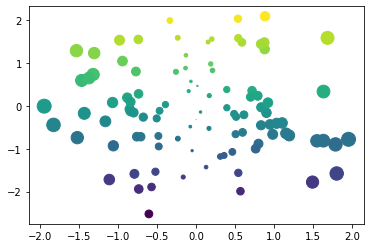

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));

In [6]:
df.style

2)	Missing Values By Year, Excluding Inactive Records

Note: There are no missing values for age.  Starting in 2014 , the number of missing scores dropped noticeably due to changes in the format and contents of the file sent to Experian for scoring, resulting in a higher ‘hit-rate’ of customers and fewer missing scores.  

3)	Data groups

The Missing Data Group is comprised of records missing the FICO or BKRPT score.  


In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

In [2]:
import pandas as pd
df = pd.read_csv('/project_data/data_asset/Test_fields_100821_results.csv')
df.head()

,HALF,DOWNNUM,YARDSTOGO,SCOREDIFF,TIMELEFT,DOWNNAME,TRUEFIELD,YARDSGAINED_Mean,AVG_OVER_TOGO,PLAYIDSTR,RUN_PASS,CONCEPT_8,CONCEPT_9,pred_TD,prob_TD_NO,prob_TD_YES,pred_FIRST,prob_FIRST_NO,prob_FIRST_YES
0,0,0,5,0,480,1st,35,6.360000,1.272000,100000020,RUN,2,0,N,0.989181,0.010819,N,0.562406,0.437594
1,0,0,9,-7,1050,1st,45,4.756098,0.528455,100000054,RUN,5,4,N,0.999278,0.000722,Y,0.439296,0.560704
2,0,2,4,7,600,3rd,5,8.164835,2.041209,200000049,PASS,4,9,N,0.929720,0.070280,Y,0.391968,0.608032
3,0,0,11,7,180,1st,45,6.216667,0.565152,200000041,PASS,4,1,N,0.999941,0.000059,N,0.676803,0.323197
4,0,0,1,0,60,1st,45,13.416667,13.416667,200000085,PASS,8,5,N,0.800383,0.199617,N,0.608495,0.391505


In [ ]:
# palette = sns.color_palette("mako_r", 2)
# sns.lineplot(
#     data=df, x="YARDSTOGO", y="prob_FIRST_YES",
#     hue="RUN_PASS", style="RUN_PASS",
#     palette=palette
# )

In [23]:
# Imports
import pandas as pd
import numpy as np # for calculating standard deviation and mean
import scipy.stats as sp # for calculating standard error
import matplotlib.pyplot as plt # for improving our visualizations# Read data


In [27]:
first_prob = df.groupby(['CONCEPT_8','YARDSTOGO'])['prob_FIRST_YES'].agg([np.mean, np.std]).reset_index()
first_prob

,CONCEPT_8,YARDSTOGO,mean,std
0,1,1,0.689542,0.135284
1,1,2,0.679022,0.101312
2,1,3,0.617726,0.112089
3,1,4,0.591071,0.106505
4,1,5,0.576179,0.117321
...,...,...,...,...
94,9,7,0.478114,0.124801
95,9,8,0.498963,0.140859
96,9,9,0.467695,0.140666
97,9,10,0.484774,0.147744


<Figure size 432x288 with 0 Axes>

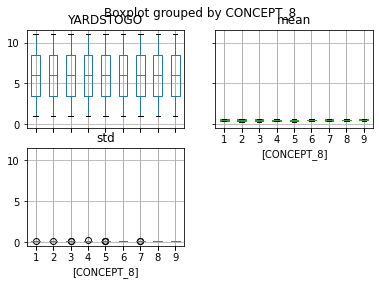

In [31]:
plt.figure();

bp = first_prob.boxplot(by=['CONCEPT_8'])

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


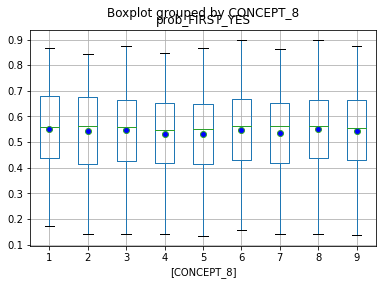

In [46]:
red_circle = dict(marker = 'o')
mean_shape = dict(markerfacecolor='blue', marker = 'o')
bp = df.boxplot(column=["prob_FIRST_YES"], by=["CONCEPT_8"], showmeans=True, meanprops=mean_shape)

#bp = first_prob.boxplot(column=["mean", "std"], by=["CONCEPT_8", "YARDSTOGO"])

In [4]:
# import numpy as np
# import pylab as plt

# X = np.linspace(0,5,100)
# Y1 = X + 2*np.random.random(X.shape)
# Y2 = X**2 + np.random.random(X.shape)


# plt.df.boxplot(column=["prob_FIRST_YES"], by=["CONCEPT_8"])
# plt.scatter(X,Y2,color='g')
# plt.show()

In [ ]:
import numpy as np
import pylab as plt

X = np.linspace(0,5,100)
Y1 = X + 2*np.random.random(X.shape)
Y2 = X**2 + np.random.random(X.shape)

plt.scatter(X,Y1,color='k')
plt.scatter(X,Y2,color='g')
plt.show()

In [5]:
# ax = first_prob.plot(kind = "barh", y = "mean", legend = False, title = "Average First Down Chance", colors = ["steelblue", "seagreen"]) # no error bars added here# X
# ax.set_xlabel("Likelihood (%)")# Y
# ax.set_ylabel("")
# #ax.set_yticklabels(["Conventional", "Organic"])# Overall
# for key, spine in ax.spines.items():
#     spine.set_visible(False)
# ax.tick_params(bottom = False, left = False)
# ax.errorbar(first_prob["mean"], first_prob.index, xerr = first_prob["std"], 
#             linewidth = 1.5, color = "black", alpha = 0.4, capsize = 4)

In [6]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# # Load the example exercise dataset
# #df = sns.load_dataset("exercise")


# # Draw a pointplot to show pulse as a function of three categorical factors
# g = sns.catplot(x="YARDSTOGO", y="prob_FIRST_YES", hue="CONCEPT_8", col="RUN_PASS",
#                 capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
#                 kind="point", data=df)
# g.despine(left=True)

# Building Graphics

In [22]:
import pandas as pd
import numpy as np

In [13]:
import pandas as pd
df = pd.read_csv('/project_data/data_asset/Test_fields_100821_results.csv')
df2 = df[["prob_FIRST_YES", "YARDSTOGO", "CONCEPT_9","RUN_PASS"]]
df2.head()

,prob_FIRST_YES,YARDSTOGO,CONCEPT_9,RUN_PASS
0,0.437594,5,0,RUN
1,0.560704,9,4,RUN
2,0.608032,4,9,PASS
3,0.323197,11,1,PASS
4,0.391505,1,5,PASS


In [14]:
c9_pass0 = df2[(df2['RUN_PASS']=='PASS') & (df2['CONCEPT_9']==0)]
c9_pass0 = c9_pass0[["prob_FIRST_YES", "YARDSTOGO"]]
c9_pass0.head()

,prob_FIRST_YES,YARDSTOGO
10,0.507527,9
29,0.518098,11
46,0.420920,10
69,0.457654,10
74,0.243133,11


In [15]:
data = c9_pass0.groupby(["YARDSTOGO"])

In [18]:
# Evalualte only PASS for all Concept 9 plays
c9_pass = df2[df2['RUN_PASS']=='PASS']

In [20]:
df_pass_mean = df2.groupby(["PLAYID", "YARDSTOGO"]).mean()
#c9_pass_mean

In [23]:
df_pass_mean

prob_FIRST_YES  prob_TD_YES
PLAYID YARDSTOGO                             
PASS4  1                0.673815     0.192542
       2                0.624628     0.169877
       3                0.593560     0.116732
       4                0.576213     0.100417
       5                0.549105     0.173741
...                          ...          ...
RUN5   7                0.440784     0.104449
       8                0.454168     0.119026
       9                0.436318     0.079182
       10               0.421065     0.061001
       11               0.330726     0.086829

[110 rows x 2 columns]

In [21]:
# Format data for plotting
result = {}
for row, data in df_pass_mean.iterrows():
#     print(row,data)
    play_number = row[0]
    x = row[1] # yardstogo
    y = data['prob_FIRST_YES'] # mean probability of first down for x yards-to-go
    if play_number not in result:
        result[play_number] = {}
        result[play_number]['x'] = []
        result[play_number]['y'] = []
    result[play_number]['x'].append(x)
    result[play_number]['y'].append(y)

In [24]:
result

{'PASS4': {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'y': [0.6738153150297033,
   0.6246283370190474,
   0.5935603069042552,
   0.576213009227273,
   0.549105183568182,
   0.5609508190142858,
   0.4708156459885057,
   0.4693076002560975,
   0.44301580469333346,
   0.43342959596511627,
   0.38393607882222214]},
 'PASS5': {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'y': [0.6631952923636363,
   0.6631463313831778,
   0.6053263518545456,
   0.5611858025631069,
   0.5599381804392523,
   0.5660304164743588,
   0.4743161176222221,
   0.4707054462048193,
   0.47309262826666676,
   0.4426051746282053,
   0.3575349923882353]},
 'PASS6': {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'y': [0.6797579721632655,
   0.6594293667999996,
   0.615811012189655,
   0.5578300178039214,
   0.5694110184464284,
   0.5485211660384616,
   0.5143728474880951,
   0.48639336752439016,
   0.4647205068888888,
   0.48662432101333347,
   0.3607196229012346]},
 'PASS7': {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'y'

In [31]:
import numpy as np

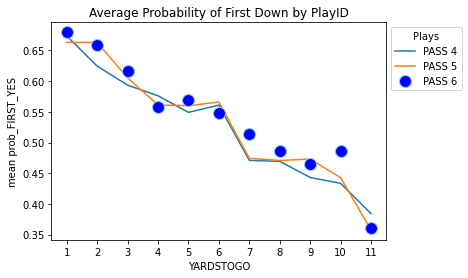

In [34]:
plt.plot(pd.DataFrame(result['PASS4']['y'],result['PASS4']['x']), label="PASS 4")
plt.plot(pd.DataFrame(result['PASS5']['y'],result['PASS5']['x']), label="PASS 5")
plt.plot(pd.DataFrame(result['PASS6']['y'],result['PASS6']['x']), label="PASS 6", marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=0)
plt.xticks(np.sort(df2['YARDSTOGO'].unique()))
plt.legend(loc='upper left', title="Plays", bbox_to_anchor=(1, 1))
plt.xlabel("YARDSTOGO")
plt.ylabel("mean prob_FIRST_YES")
plt.title("Average Probability of First Down by PlayID")
plt.show()

In [46]:
# Group by yards to go for play 0 probability of first down
data = c9_pass0.groupby(["YARDSTOGO"])
# print("number of groups:",data.ngroups)
#data.groups


In [49]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
c9_pass0 = df2[(df2['RUN_PASS']=='PASS') & (df2['CONCEPT_9']==0)]
c9_pass0 = c9_pass0[["prob_FIRST_YES", "YARDSTOGO"]]
c9_pass0.head()

In [4]:
df['PLAYID'] = df["RUN_PASS"] + df["CONCEPT_8"].astype(str)

In [6]:
df2 = df[["prob_FIRST_YES", "prob_TD_YES", "YARDSTOGO", "PLAYID"]]
df2.head()

,prob_FIRST_YES,prob_TD_YES,YARDSTOGO,PLAYID
0,0.437594,0.010819,5,RUN2
1,0.560704,0.000722,9,RUN5
2,0.608032,0.070280,4,PASS4
3,0.323197,0.000059,11,PASS4
4,0.391505,0.199617,1,PASS8


In [18]:
# Group by yards to go for play 0 probability of first down
data = df2.groupby(["PLAYID"])
print("number of groups:",data.ngroups)
data.groups

number of groups: 10


{'PASS4': Int64Index([   2,    3,   20,   38,   41,   44,   61,   77,   96,  100,
             ...
             9893, 9897, 9903, 9925, 9930, 9951, 9960, 9972, 9980, 9998],
            dtype='int64', length=988),
 'PASS5': Int64Index([  14,   15,   50,   59,  113,  117,  120,  123,  126,  141,
             ...
             9896, 9912, 9923, 9928, 9929, 9931, 9962, 9969, 9975, 9978],
            dtype='int64', length=1030),
 'PASS6': Int64Index([   6,   10,   29,   37,   62,   72,   79,  101,  102,  103,
             ...
             9909, 9913, 9920, 9924, 9954, 9955, 9961, 9965, 9977, 9999],
            dtype='int64', length=1023),
 'PASS7': Int64Index([  30,   43,   45,   49,   65,   75,   82,  109,  112,  115,
             ...
             9921, 9933, 9941, 9948, 9949, 9976, 9979, 9987, 9989, 9990],
            dtype='int64', length=986),
 'PASS8': Int64Index([   4,    5,   11,   12,   18,   26,   34,   40,   54,   63,
             ...
             9901, 9911, 9918, 9927, 9934, 9937

In [9]:
data

In [11]:
import matplotlib.pyplot as plt

In [ ]:
for d in data.groups:
    yardstogo = d
    prob_FIRST_YES = data.get_group(yardstogo)
    bp_data.append(prob_FIRST_YES['prob_FIRST_YES'].values)
#     print(d, prob_FIRST_YES['prob_FIRST_YES'].values)
#     print()
ax1.boxplot(bp_data)
plt.xlabel("YARDSTOGO")
plt.ylabel("prob_FIRST_YES")

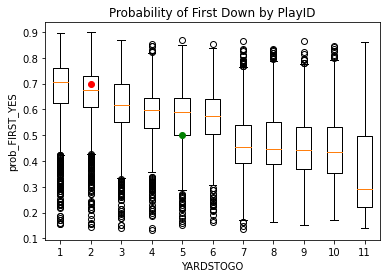

In [17]:
# boxplot for PlayID, probability of first down with each yard to go
fig1, ax1 = plt.subplots()
ax1.set_title('Probability of First Down by PlayID')
bp_data = []

for d in data.groups:
    yardstogo = d
    prob_FIRST_YES = data.get_group(yardstogo)
    bp_data.append(prob_FIRST_YES['prob_FIRST_YES'].values)
#     print(d, prob_FIRST_YES['prob_FIRST_YES'].values)
#     print()
ax1.boxplot(bp_data)
plt.xlabel("YARDSTOGO")
plt.ylabel("prob_FIRST_YES")

# Additional Points
plt.plot(5, 0.5, 'go') # add green dot to yardtogo=5 and prob_FIRST_YES=0.5
plt.plot(2, 0.7, 'ro') # add red dot to yardtogo=2 and prob_FIRST_YES=0.7

plt.show()

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


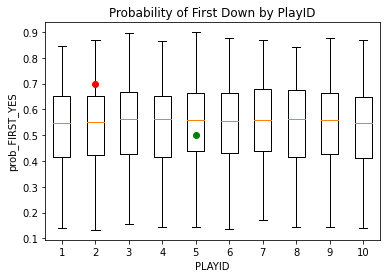

In [19]:
# boxplot for PlayID, probability of first down with each yard to go
fig1, ax1 = plt.subplots()
ax1.set_title('Probability of First Down by PlayID')
bp_data = []

for d in data.groups:
    playid = d
    prob_FIRST_YES = data.get_group(playid)
    bp_data.append(prob_FIRST_YES['prob_FIRST_YES'].values)
#     print(d, prob_FIRST_YES['prob_FIRST_YES'].values)
#     print()
ax1.boxplot(bp_data)
plt.xlabel("PLAYID")
plt.ylabel("prob_FIRST_YES")

# Additional Points
plt.plot(5, 0.5, 'go') # add green dot to yardtogo=5 and prob_FIRST_YES=0.5
plt.plot(2, 0.7, 'ro') # add red dot to yardtogo=2 and prob_FIRST_YES=0.7

plt.show()

In [35]:
 prob_FIRST_YES.dtypes

prob_FIRST_YES    float64
YARDSTOGO           int64
dtype: object